To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/HW%201.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

In [1]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks/

Cloning into 'foster_2020'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 201 (delta 17), reused 81 (delta 7), pack-reused 109
Receiving objects: 100% (201/201), 54.10 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Checking out files: 100% (94/94), done.
/content/foster_2020/Homeworks


# Homework 1

## Part 1: Conceptual exercises

** 1. In 2-4 sentences, differentiate “Data Science” and “Big Data”, and also tell how they are related. **

Data Science refers to all things and process we need to do relateed to data, such as data cleansing, data mining, and data analysis. But Big Data just refers to the massive data. "Data Science" can use "Big Data" to do analysis. 

** 2. MTC (MegaTelCo) has decided to use supervised learning to address its problem of churn in its wireless phone business.  As a consultant to MTC, you realize that a main task in the business understanding/data understanding phases of the data mining process is to define the target variable.  In one or two sentences, please suggest a definition for the target variable.  Be as precise as possible—someone else will be implementing your suggestion.  (Remember: it should make sense from a business point of view, and it should be reasonable that MTC would have data available to know the value of the target variable for historical customers.) **

Target variable means the value can be predicted by other variables using the machine learning model. In the MTC case, target variable is whether customer would leave in 90 days of the contract expires: 0(leave) or 1(still here). In this case, TV can be predicted by their last month usage in 90 days of expiration and find the pattern of people who would leave, then before 50 days of the contract ends, taking methods like ads or discount to maintain the relationship. 

## Part 2: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data: 

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340) 
3. TOEFL Scores (out of 120) 
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5) 
7. Undergraduate GPA (out of 10) 
8. Research Experience (either 0 or 1) 
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

In [0]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

** 1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset. **

In [3]:
data_path = "./data/data-hw1.csv"
csv_data = pd.read_csv(data_path, low_memory = False)
df = pd.DataFrame(csv_data)
print(df)

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit
0             1        337          118  ...  9.65         1             0.92
1             2        324          107  ...  8.87         1             0.76
2             3        316          104  ...  8.00         1             0.72
3             4        322          110  ...  8.67         1             0.80
4             5        314          103  ...  8.21         0             0.65
..          ...        ...          ...  ...   ...       ...              ...
495         496        332          108  ...  9.02         1             0.87
496         497        337          117  ...  9.87         1             0.96
497         498        330          120  ...  9.56         1             0.93
498         499        312          103  ...  8.43         0             0.73
499         500        327          113  ...  9.04         0             0.84

[500 rows x 9 columns]


(Optional) Rename the columns in the dataframe to manipulate the data more easily. No extra points for this, but it might make your life easier.

In [4]:
# Put your (optional) answer here.
df = df.rename(columns={'Serial No.': 'ID'})
df = df.rename(columns={'GRE Score': 'GRE'})
df = df.rename(columns={'TOEFL Score': 'TOEFL'})
df = df.rename(columns={'University Rating': 'Rating'})
df = df.rename(columns={'Chance of Admit': 'Admit'})
# Or this if you know the order of the columns:
# df.columns = ["ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"]
df.head()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


** 2. Show descriptive statistics for all columns. **

In [0]:
#YOUR CODE HERE
df.describe()


,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(Optional 2) Drop the column "Serial No". Again, no extra points for this, but it might be helpful to visualize things later on.

In [5]:
#YOUR CODE HERE
df.drop(['ID'], axis=1,inplace=True)
print(df)

     GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Admit
0    337    118       4  4.5  4.5  9.65         1   0.92
1    324    107       4  4.0  4.5  8.87         1   0.76
2    316    104       3  3.0  3.5  8.00         1   0.72
3    322    110       3  3.5  2.5  8.67         1   0.80
4    314    103       2  2.0  3.0  8.21         0   0.65
..   ...    ...     ...  ...  ...   ...       ...    ...
495  332    108       5  4.5  4.0  9.02         1   0.87
496  337    117       5  5.0  5.0  9.87         1   0.96
497  330    120       5  4.5  5.0  9.56         1   0.93
498  312    103       4  4.0  5.0  8.43         0   0.73
499  327    113       4  4.5  4.5  9.04         0   0.84

[500 rows x 8 columns]


** 3. What is the distribution of the chances of admit? Plot an histogram of this variable. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c45d22710>]],
      dtype=object)

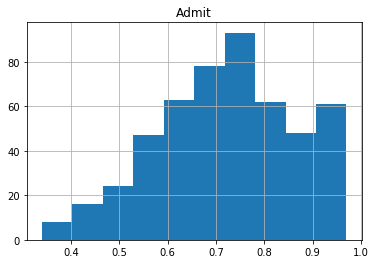

In [0]:
#YOUR CODE HERE
df.hist(column="Admit")

** 4. Chances of admit seem to vary quite a bit. How much of this depends on the quality of the university that the applicant attended? Print the average chance of admit per university rating. **

In [0]:
#YOUR CODE HERE
grouped = df['Admit'].groupby(df['Rating'])
grouped.mean()

Rating
1    0.562059
2    0.626111
3    0.702901
4    0.801619
5    0.888082
Name: Admit, dtype: float64

** 5. Does the distribution of chances of admit change with university rating? Plot an histogram of chances of admit for each university rating. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb07bf28048>,
      dtype=object)

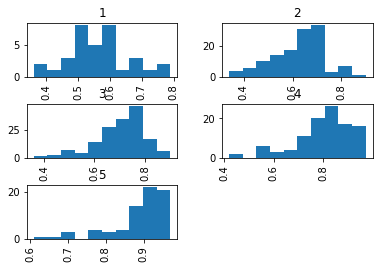

In [0]:
#YOUR CODE HERE
df.hist(column = "Admit", by = "Rating")

** 6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between GRE and chance of admit. **

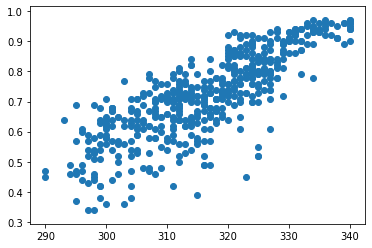

In [0]:
#YOUR CODE HERE
plt.scatter(df['GRE'], df['Admit'])

** 7. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "Research". **

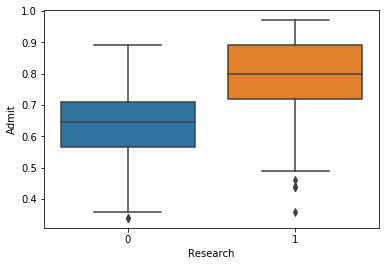

In [0]:
#YOUR CODE HERE
sns.boxplot(x="Research", y="Admit", data=df)

** 8. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe. Display the correlations between all pairs of columns. **

In [0]:
#YOUR CODE HERE
pearsoncorr = df.corr(method='pearson')
print(pearsoncorr)

               GRE     TOEFL    Rating  ...      CGPA  Research     Admit
GRE       1.000000  0.827200  0.635376  ...  0.825878  0.563398  0.810351
TOEFL     0.827200  1.000000  0.649799  ...  0.810574  0.467012  0.792228
Rating    0.635376  0.649799  1.000000  ...  0.705254  0.427047  0.690132
SOP       0.613498  0.644410  0.728024  ...  0.712154  0.408116  0.684137
LOR       0.524679  0.541563  0.608651  ...  0.637469  0.372526  0.645365
CGPA      0.825878  0.810574  0.705254  ...  1.000000  0.501311  0.882413
Research  0.563398  0.467012  0.427047  ...  0.501311  1.000000  0.545871
Admit     0.810351  0.792228  0.690132  ...  0.882413  0.545871  1.000000

[8 rows x 8 columns]


** 9. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit? **

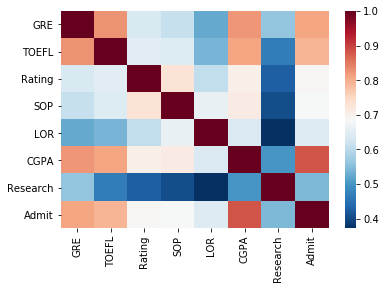

In [0]:
#YOUR CODE HERE
sns.heatmap(pearsoncorr, cmap='RdBu_r')

The most correlated variables are GPA and Chance of Admit. GPA seems to be the most informative variable.

** 10. Following the example in class, build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quality to the actual value in a scatter plot. **

In [11]:
#YOUR CODE HERE
from sklearn import linear_model 
my_linear = linear_model.Lasso(alpha=0.01)
features = ["GRE", "TOEFL", "Rating", "CGPA","Research"]
target = "Admit"
my_linear.fit(df[features], df[target])
pd.DataFrame([dict(zip(features, my_linear.coef_))])


,GRE,TOEFL,Rating,CGPA,Research
0,0.004933,0.006148,0.011518,0.036974,0.0


In [8]:
preds = my_linear.predict(df[features])
predictions_df = df.assign(predictions=preds)
predictions_df[["Admit", "predictions"]].head(5)

,Admit,predictions
0,0.92,0.939351
1,0.76,0.778755
2,0.72,0.677161
3,0.80,0.768420
4,0.65,0.657394


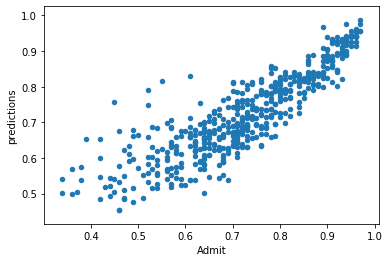

In [12]:
predictions_df.plot(kind="scatter", x="Admit", y="predictions")

** 11. (Extra Points, Optional) There are many different types of predictive models, each with their own plusses and minuses. For this task, repeat your modeling performed in step 8, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results? **

In [34]:
from sklearn.ensemble import RandomForestRegressor
#YOUR CODE HERE
my_regressor = RandomForestRegressor() 
my_regressor.fit(df[features], df[target])   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

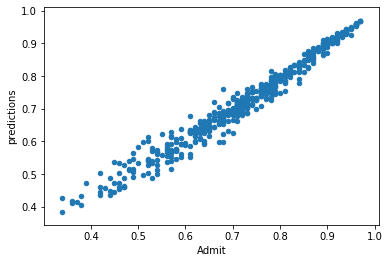

In [44]:
preds2 = my_regressor.predict(df[features])
predictions_df = df.assign(predictions=preds2)
predictions_df.plot(kind="scatter", x="Admit", y="predictions")
#The result of RandomForestRegressor fits better with the real result than the linear model.

This scatter plot shows better predictions, but as we saw in the previous class, the model could be overfitting.